# **Lung cancer classification using Computered Tomography (CT) scans**

### General information:

**Subject**: Laboratório de Inteligencia Artificial e Ciências de dados

**class**: CC3044_TP3

**Work carried out by**: Hugo Duarte de Sousa, Jakub Wilk, Martim Cerqueira Fernandes, Yan de Oliveira Christiano Coelho

### Project outline:
1) Brief rundown and presentation of the project;
2) Process of data extraction;
3) Exploratory Data Analysis, data cleaning and data analysis;
4) Evaluate the dataset using various classification algorithms and performance metrics to identify the most suitable model;
5) Observation and conclusions.

----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------

## **Project's main objective**


The primary objective of this project is to classify the malignancy of lung cancer nodules, as lung cancer has the highest mortality rate among all cancers. The goal is to detect and assess nodule malignancy in order to support early diagnosis and reduce the risk of fatal outcomes. We were provided with computed tomography (CT) images from the LIDC-IDRI dataset, from which relevant features were extracted. Using these extracted features, we then trained and evaluated several machine learning models with various performance metrics to determine their effectiveness in correctly classifying nodule malignancy.

We will be using different ways to extract the data from the images, as well as training different machine learning models using different datasets and comparing the results. Finding the best possible sets of features to achieve the best accuracy.

#### Some extra Information:
- link to the dataset: https://www.cancerimagingarchive.net/collection/lidc-idri/
- Article about cancer diagnostics in 2022: https://pubmed.ncbi.nlm.nih.gov/38572751/
- Python library designed for LIDC-IDRI dataset: https://pylidc.github.io/
- Pyradiomics documentation: https://pyradiomics.readthedocs.io/en/latest/


## **Features extraction**

For this project, we used three different methods to extract features: Pylidc, Pyradiomics, and CNN (Convolutional Neural Network). Each method produced distinct feature sets. In this part, we will go over the process of the data extracted from the given image files.

It is important to mention the pylidc.conf file, in order for these libraries to read the dicom files, it is required to create a pylidc.conf file in the user's directory. Follow the tutorial here: https://pylidc.github.io/install.html

### Features extracted using the Pylidc library

In [ ]:
import pylidc as pl
import numpy as np
import pandas as pd
import os
import time

# --- Configuration ---
RAW_DATA_PATH = 'data/raw/manifest-1600709154662/LIDC-IDRI'
PROCESSED_DATA_PATH = 'data/processed'
OUTPUT_CSV_NAME = 'pylidc_features.csv'

# --- Feature Extraction Logic ---
def extract_pylidc_features():
    """
    Iterates through all patient scans, calculates consensus semantic features 
    (radiologist ratings) for each nodule, and saves them to a CSV file along 
    with unique identifiers for merging.
    """
    metadata_list = []

    try:
        patient_ids = [name for name in os.listdir(RAW_DATA_PATH) if os.path.isdir(os.path.join(RAW_DATA_PATH, name))]
    except FileNotFoundError:
        print(f"Error: Data directory not found at '{RAW_DATA_PATH}'")
        return

    print(f"Starting Semantic Feature extraction for {len(patient_ids)} patients...")
    start_time = time.time()

    for i, patient_id in enumerate(patient_ids):
        try:
            print(f"\nProcessing patient {i+1}/{len(patient_ids)}: {patient_id}")
            scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == patient_id).first()
            nodules = scan.cluster_annotations()

            if len(nodules) == 0:
                continue
                
                else:
                    nodule_features = {
                        'patient_id': patient_id,
                        'nodule_idx': j,
                        'subtlety': np.mean([ann.subtlety for ann in ann_cluster]),
                        'internalStructure': np.mean([ann.internalStructure for ann in ann_cluster]),
                        'calcification': np.mean([ann.calcification for ann in ann_cluster]),
                        'sphericity': np.mean([ann.sphericity for ann in ann_cluster]),
                        'margin': np.mean([ann.margin for ann in ann_cluster]),
                        'lobulation': np.mean([ann.lobulation for ann in ann_cluster]),
                        'spiculation': np.mean([ann.spiculation for ann in ann_cluster]),
                        'texture': np.mean([ann.texture for ann in ann_cluster]),
                        'malignancy': np.mean([ann.malignancy for ann in ann_cluster])
                    }
                    metadata_list.append(nodule_features)

        except Exception as e:
            print(f"  - !!! An error occurred for patient {patient_id}: {e}. Skipping.")

    end_time = time.time()
    print("\n" + "-"*50)
    print(f"Processing complete in {(end_time - start_time) / 60:.2f} minutes.")

    # Convert the list of dictionaries to a DataFrame and save to CSV
    df_semantic = pd.DataFrame(metadata_list)
    
    os.makedirs(PROCESSED_DATA_PATH, exist_ok=True)
    output_path = os.path.join(PROCESSED_DATA_PATH, OUTPUT_CSV_NAME)
    df_semantic.to_csv(output_path, index=False)
    
    print(f"\nSemantic features saved successfully to '{output_path}'")
    print(f"Final shape of the semantic features dataset: {df_semantic.shape}")
    print("-" * 50)

if __name__ == '__main__':
    extract_pylidc_features()

In [1]:
import pandas as pd

df_pylidc = pd.read_csv("data/processed/pylidc_features.csv")
df_pylidc.describe()

,nodule_idx,subtlety,internalStructure,calcification,sphericity,margin,lobulation,spiculation,texture,malignancy
count,2586.000000,2586.000000,2586.000000,2586.000000,2586.000000,2586.000000,2586.000000,2586.000000,2586.000000,2586.000000
mean,2.167440,3.654035,1.013663,5.675013,3.773879,3.866622,1.622325,1.526875,4.314804,2.688773
std,2.798763,1.077582,0.158948,0.853227,0.780062,1.083189,0.828801,0.834105,1.158321,0.915125
min,0.000000,1.000000,1.000000,2.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,3.000000,1.000000,6.000000,3.000000,3.250000,1.000000,1.000000,4.000000,2.000000
50%,1.000000,4.000000,1.000000,6.000000,4.000000,4.000000,1.250000,1.000000,5.000000,2.750000
75%,3.000000,4.500000,1.000000,6.000000,4.333333,4.750000,2.000000,1.750000,5.000000,3.000000
max,22.000000,5.000000,5.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Features extracted using Pyradiomcis


Make sure the pylidc.conf is correctly configured

In [ ]:
import pylidc as pl
import numpy as np
import os
import SimpleITK as sitk
import pandas as pd
from radiomics import featureextractor
from pylidc.utils import consensus

# --- Configuration ---
RAW_DATA_PATH = 'data/raw/manifest-1600709154662/LIDC-IDRI'
PROCESSED_DATA_PATH = 'data/processed'
OUTPUT_CSV_NAME = 'radiomics_features.csv'

# --- Feature Extraction Logic ---
def extract_radiomics_features():
    extractor = featureextractor.RadiomicsFeatureExtractor()
    all_features = []

    try:
        patient_ids = [name for name in os.listdir(RAW_DATA_PATH) if os.path.isdir(os.path.join(RAW_DATA_PATH, name))]
    except FileNotFoundError:
        print(f"Error: Data directory not found at '{RAW_DATA_PATH}'")
        return

    print(f"Starting 3D Radiomics feature extraction for {len(patient_ids)} patients...")

    for i, patient_id in enumerate(patient_ids):
        print(f"\nProcessing patient {i+1}/{len(patient_ids)}: {patient_id}")
        try:
            scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == patient_id).first()
            nodules = scan.cluster_annotations()
            vol = scan.to_volume(verbose=False)

            for j, ann_cluster in enumerate(nodules):
                try:
                    cmask, cbbox, _ = consensus(ann_cluster, clevel=0.5)
                    nodule_vol = vol[cbbox]

                    image_sitk = sitk.GetImageFromArray(nodule_vol)
                    image_sitk.SetSpacing((float(scan.pixel_spacing), float(scan.pixel_spacing), float(scan.slice_thickness)))
                    
                    mask_sitk = sitk.GetImageFromArray(cmask.astype(np.uint8))
                    mask_sitk.SetSpacing((float(scan.pixel_spacing), float(scan.pixel_spacing), float(scan.slice_thickness)))
                    
                    feature_vector = extractor.execute(image_sitk, mask_sitk)
                    
                    feature_vector['patient_id'] = patient_id
                    feature_vector['nodule_idx'] = j
                    
                    all_features.append(feature_vector)
                    print(f"  - Extracted features for nodule #{j+1}")

                except Exception as e:
                    print(f"  - !!! Could not process nodule #{j+1}: {e}")
        
        except Exception as e:
            print(f"  - !!! An error occurred for patient {patient_id}: {e}. Skipping.")

    df_features = pd.DataFrame(all_features)
    
    os.makedirs(PROCESSED_DATA_PATH, exist_ok=True)
    output_path = os.path.join(PROCESSED_DATA_PATH, OUTPUT_CSV_NAME)
    df_features.to_csv(output_path, index=False)
    
    print(f"\nRadiomics features saved successfully to '{output_path}'")
    print(f"Final shape of the radiomics features dataset: {df_features.shape}")

if __name__ == '__main__':
    extract_radiomics_features()

In [2]:
import pandas as pd

df_radiomics = pd.read_csv("data/processed/radiomics_features.csv")
df_radiomics.describe()

,diagnostics_Image-original_Mean,diagnostics_Image-original_Minimum,diagnostics_Image-original_Maximum,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_VolumeNum,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,...,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,nodule_idx
count,2586.000000,2586.000000,2586.000000,2586.000000,2586.000000,2586.000000,2586.000000,2586.000000,2586.000000,2586.000000,...,2586.000000,2586.000000,2586.000000,2586.000000,2586.000000,2586.000000,2586.000000,2586.000000,2586.000000,2586.000000
mean,-590.561088,-952.973318,287.501160,762.068059,1.028229,0.426049,0.210877,3.061880,20.314243,22.823305,...,0.030272,5.349086,0.611430,154.786230,0.149346,0.042193,4234.642965,1.060839,16.532265,2.167440
std,154.314243,70.938847,571.382819,2151.367351,0.373669,0.189394,0.157444,2.421182,17.289516,20.344514,...,0.029989,0.785842,0.173885,1212.944555,0.218676,0.039709,10235.694972,2.335602,19.801951,2.798763
min,-895.726852,-1403.000000,-728.000000,5.000000,1.000000,0.074119,0.000000,0.000000,2.873162,3.048047,...,0.000720,2.000000,0.054118,0.000000,0.009278,0.000168,9.923645,0.008199,0.154855,0.000000
25%,-706.404545,-1020.000000,-33.750000,74.000000,1.000000,0.271655,0.082762,1.593118,9.464376,10.119955,...,0.011117,4.836434,0.501471,0.549135,0.048553,0.014922,744.363702,0.328002,5.384874,0.000000
50%,-615.852222,-964.000000,108.000000,147.000000,1.000000,0.384775,0.165089,2.419797,14.917785,16.076113,...,0.021300,5.378882,0.631922,1.386034,0.084500,0.032832,1515.329435,0.555572,10.326174,1.000000
75%,-498.395748,-909.250000,469.000000,408.750000,1.000000,0.561224,0.313374,3.629802,24.078748,27.000000,...,0.038969,5.887882,0.737267,6.223255,0.160631,0.056236,2760.727118,0.903901,18.163758,3.000000
max,359.254545,-263.000000,3071.000000,45329.000000,17.000000,0.995429,0.845774,28.895006,144.886077,165.000000,...,0.319763,7.837516,1.000000,31276.863722,4.410269,0.452403,141760.601040,41.205729,156.885988,22.000000


### Feature extraction using CNN



This part is separated into two parts:
1) Creating a metadata file and .npy files for the CNN
2) Extracting featues using CNN

#### **Part 1**:

This part is dedicated to create the metadata.csv and .npy file for the CNN to extract the features

In [ ]:
# Step 1: Import necessary libraries
import pylidc as pl
import numpy as np
import pandas as pd
from scipy.ndimage import zoom
import os
import time

# Step 2: Define script-level constants
# ---------------------------------------
# Path to the raw LIDC-IDRI data.
RAW_DATA_PATH = 'data/raw/manifest-1600709154662/LIDC-IDRI'

# Path to save the processed dataset files.
PROCESSED_DATA_PATH = 'data/processed'

# The uniform 3D size (Depth, Height, Width) for all nodule volumes.
TARGET_SIZE = (48, 48, 48)

# Step 3: Main data processing function
# --------------------------------------
def create_cnn_dataset():
    """
    Iterates through all patient scans, extracts nodules, and preprocesses them
    to generate the dataset for the CNN feature extractor. It saves two files:
    1. A .npy file with the 3D image volumes.
    2. A .csv file with metadata (IDs, labels) and semantic features.
    """
    # Lists to hold the final processed data
    X_images = []       # For the 3D nodule image volumes
    metadata_list = []  # For all other data (IDs, labels, semantic features)

    # --- Find all available patient IDs dynamically ---
    try:
        patient_ids = [name for name in os.listdir(RAW_DATA_PATH) if os.path.isdir(os.path.join(RAW_DATA_PATH, name))]
    except FileNotFoundError:
        print(f"Error: Data directory not found at '{RAW_DATA_PATH}'.")
        return

    print(f"Starting dataset creation for {len(patient_ids)} patients...")
    start_time = time.time()

    # --- Loop through each patient ---
    for i, patient_id in enumerate(patient_ids):
        try:
            print(f"\nProcessing patient {i+1}/{len(patient_ids)}: {patient_id}")
            scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == patient_id).first()
            vol = scan.to_volume(verbose=False)
            nodules = scan.cluster_annotations()

            if len(nodules) == 0:
                print(f"  - No nodules found for this patient. Skipping.")
                continue

            # --- Loop through each nodule in the scan ---
            for j, ann_cluster in enumerate(nodules):
                # 1. GET LABEL & SEMANTIC FEATURES: Calculate consensus values.
                malignancy = np.mean([ann.malignancy for ann in ann_cluster])
                if np.isclose(malignancy, 3):
                    continue
                label = 1 if malignancy > 3 else 0

                semantic_features = {
                    'spiculation': np.mean([ann.spiculation for ann in ann_cluster]),
                    'lobulation': np.mean([ann.lobulation for ann in ann_cluster]),
                    'margin': np.mean([ann.margin for ann in ann_cluster]),
                    'sphericity': np.mean([ann.sphericity for ann in ann_cluster]),
                    'texture': np.mean([ann.texture for ann in ann_cluster])
                }

                # 2. PREPROCESS 3D VOLUME (Crop, Resize, Normalize)
                bbox = ann_cluster[0].bbox()
                nodule_volume = vol[bbox]
                
                original_shape = nodule_volume.shape
                zoom_factors = [ts / os for ts, os in zip(TARGET_SIZE, original_shape)]
                resized_volume = zoom(nodule_volume, zoom_factors, order=1, mode='nearest')
                
                min_val, max_val = resized_volume.min(), resized_volume.max()
                normalized_volume = (resized_volume - min_val) / (max_val - min_val) if min_val != max_val else np.zeros(TARGET_SIZE)

                # 3. STORE DATA: Append the image to one list and all metadata to another.
                X_images.append(normalized_volume)
                
                nodule_metadata = {
                    'patient_id': patient_id,
                    'nodule_idx': j,
                    'label': label,
                    'malignancy': malignancy,
                    **semantic_features # Unpacks the dictionary
                }
                metadata_list.append(nodule_metadata)

        except Exception as e:
            print(f"  - !!! An error occurred for patient {patient_id}: {e}. Skipping.")

    end_time = time.time()
    
    # --- Final summary and saving the datasets ---
    print("\n" + "-"*50)
    print(f"Processing complete in {(end_time - start_time) / 60:.2f} minutes.")
    
    if len(metadata_list) > 0:
        os.makedirs(PROCESSED_DATA_PATH, exist_ok=True)

        # Save the 3D image data as a .npy file
        images_path = os.path.join(PROCESSED_DATA_PATH, f'cnn_images_{"x".join(map(str, TARGET_SIZE))}.npy')
        X_images_np = np.array(X_images, dtype=np.float32)
        np.save(images_path, X_images_np)

        # Save all metadata and semantic features as a .csv file
        metadata_path = os.path.join(PROCESSED_DATA_PATH, 'cnn_metadata_and_semantic_features.csv')
        df_metadata = pd.DataFrame(metadata_list)
        df_metadata.to_csv(metadata_path, index=False)
        
        print(f"\nFiles saved successfully to '{PROCESSED_DATA_PATH}':")
        print(f"  - Image data saved to: {os.path.basename(images_path)} with shape {X_images_np.shape}")
        print(f"  - Metadata saved to: {os.path.basename(metadata_path)} with shape {df_metadata.shape}")
    else:
        print("No nodules were processed.")
    print("-" * 50)

# Step 4: Run the main function when the script is executed
# ---------------------------------------------------------
if __name__ == '__main__':
    create_cnn_dataset()

#### **Part 2**:

This part focuses on extracting deep features from the preprocessed 3D lung nodule images.
It builds upon the dataset generated in the previous step (where nodules were segmented from CT scans using the LIDC-IDRI annotations) and prepares compact, high-level numerical representations suitable for traditional machine learning models.

The main objectives are:

1. Load the processed 3D nodule volumes (cnn_images_...npy) together with their metadata (cnn_metadata_and_semantic_features.csv), which include patient identifiers, malignancy labels, and semantic descriptors annotated by radiologists.

2. Convert each 3D nodule into a set of representative 2D slices, feed them into a pre-trained Convolutional Neural Network (VGG16), and extract a 512-dimensional deep feature vector that captures the visual characteristics of each nodule (e.g., texture, shape, edge complexity).

3. Aggregate and save these deep feature vectors, along with their corresponding patient_id and nodule_idx, into a new file (cnn_deep_features.csv) for downstream modeling and classification experiments.

### Step 1: Import Libraries

In [1]:
# Core libraries
import numpy as np
import os
import pandas as pd

# Deep Learning framework
import tensorflow as tf 
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

# Image processing
from skimage.transform import resize

print("Libraries imported successfully.")
print(f"TensorFlow Version: {tf.__version__}")

Libraries imported successfully.
TensorFlow Version: 2.20.0


### Step 2: Load the Processed Dataset

### Understanding the Processed Input Files

Before we load the dataset, let's clarify where these two input files come from and what they contain.  
Both files were generated in the **previous preprocessing stage** (Part 1 – *Dataset Creation and Preprocessing*) using the script `create_cnn_dataset()`.

**1. `cnn_images_48x48x48.npy`**  
This NumPy file contains the **3D image volumes** of lung nodules extracted from the original LIDC-IDRI CT scans.  
- Each element is a cubic subvolume of size **48×48×48 voxels**, centered around a nodule.  
- These subvolumes were automatically cropped using the **bounding boxes defined by radiologists’ annotations**, ensuring that each cube precisely contains a single lung nodule and its immediate surrounding tissue.  
- The values are normalized to the [0, 1] range to make them suitable for input to deep learning models.

**2.  `cnn_metadata_and_semantic_features.csv`**  
This CSV file stores **non-image information** related to each nodule:
- Patient and nodule identifiers (`patient_id`, `nodule_idx`)  
- Binary malignancy label (`label`: 0 = benign, 1 = malignant), computed from the consensus of multiple radiologists  
- Semantic features rated by radiologists, such as:
  - *spiculation* (surface irregularity)  
  - *lobulation* (edge curvature)  
  - *margin* (boundary clarity)  
  - *sphericity* (roundness)  
  - *texture* (internal pattern)

Together, these two files form the **complete representation of the dataset**:
- `cnn_images_48x48x48.npy` → the **visual information** (3D voxel data)  
- `cnn_metadata_and_semantic_features.csv` → the **contextual and diagnostic information**  

In the next step, we will load both files and use them as input for the CNN-based deep feature extraction process.


In [ ]:
# Define paths to the processed data
#PROCESSED_DATA_PATH = '../data/processed'
images_path = 'data/processed/cnn_images_48x48x48.npy'
metadata_path = 'data/processed/cnn_metadata_and_semantic_features.csv'

# Load the dataset
try:
    X_images_3d = np.load(images_path)
    df_metadata = pd.read_csv(metadata_path)
    print(f"Dataset loaded successfully.")
    print(f"Shape of X_images_3d: {X_images_3d.shape}")
    print(f"Shape of df_metadata: {df_metadata.shape}")
except FileNotFoundError:
    print("Error: Dataset files not found. Please run the `make_dataset.py` script first.")

### Step 3: Preparing 2D Slices for CNN Feature Extraction

The pre-trained CNN model (VGG16) used in this stage can only process **2D RGB images**, while our input data consists of **3D nodule volumes** (48×48×48 voxels).  
Therefore, before we can extract deep features, each 3D volume must be converted into a suitable 2D image representation.

#### Conversion Strategy
Each 3D nodule is represented by its **three central 2D slices**, corresponding to the main anatomical planes used in medical imaging:
- **Axial view** — top-down view of the lungs  
- **Coronal view** — front view (as if looking at the chest)  
- **Sagittal view** — side view of the lung

These slices capture the most informative cross-sections of the nodule from different orientations.

#### Preprocessing Steps
1. For every nodule volume, extract the central slice from each of the three axes.  
2. **Resize** each slice to a standard size of `128×128` pixels to match the CNN’s expected input format.  
3. **Convert** the grayscale image (1 channel) into a 3-channel RGB image by stacking the same slice three times — this allows compatibility with pre-trained models like VGG16.  
4. Store all processed 2D slices into a single NumPy array for feature extraction.

As a result:
- Each nodule produces **3 slices**, leading to a total of `3 × N` 2D images (for N nodules).  
- The final dataset has the shape `(num_slices, 128, 128, 3)` — ready to be fed into the CNN.

This approach provides a computationally efficient way to capture 3D structural information using a 2D model without training a full 3D CNN from scratch.


In [ ]:
# Constants for the pre-trained model
IMG_SIZE = 128 # The size VGG16 is comfortable with, but smaller for efficiency (usually 224)
X_slices_2d = []

print(f"Preparing 2D slices (resizing to {IMG_SIZE}x{IMG_SIZE}) from the 3D volumes...")

for nodule_3d in X_images_3d:
    # Get the central indices of the 3D volume
    d, h, w = nodule_3d.shape
    center_d, center_h, center_w = d // 2, h // 2, w // 2

    # Extract the 3 central slices from each axis
    slices = [
        nodule_3d[center_d, :, :],   # Axial slice
        nodule_3d[:, center_h, :],   # Coronal slice
        nodule_3d[:, :, center_w]    # Sagittal slice
    ]
    
    for slice_2d in slices:
        # Resize to the CNN's expected input size
        resized_slice = resize(slice_2d, (IMG_SIZE, IMG_SIZE), anti_aliasing=True)
        
        # Convert the grayscale (1-channel) slice to a 3-channel image by stacking it
        rgb_slice = np.stack([resized_slice]*3, axis=-1)
        X_slices_2d.append(rgb_slice)

# Convert the list of slices to a single NumPy array
X_slices_2d = np.array(X_slices_2d)
print("Shape of the final 2D slices dataset:", X_slices_2d.shape)

### Step 4: Deep Feature Extraction Using a Pre-trained CNN (VGG16)

In this step, we extract **high-level deep features** from each 2D image slice of the nodules using a pre-trained **VGG16** model.

#### Overview
Instead of training a 3D CNN from scratch (which would require an enormous dataset and computational power),  
we use a **pre-trained 2D CNN** as a *feature extractor* — a common transfer learning approach.

VGG16, trained on millions of images from the **ImageNet** dataset, has convolutional filters that capture generic visual patterns such as edges, shapes, and textures.  
These patterns are also meaningful in medical imaging, allowing us to reuse the network’s feature extraction capability.

#### Step-by-step process

1. **Load the base model**  
   The VGG16 network is loaded with pre-trained ImageNet weights, but its top classification layers are removed (`include_top=False`).  
   This leaves only the convolutional layers responsible for detecting visual structures.

2. **Add a Global Average Pooling layer**  
   We attach a `GlobalAveragePooling2D` layer to the output of VGG16, which compresses the final convolutional feature maps into a single **512-dimensional vector** per image.  
   Each of the 512 values corresponds to the activation strength of a learned filter.

3. **Extract features for all slices**  
   Every 2D slice is passed through the model, producing one 512-length feature vector.  
   For 5865 slices, this results in a matrix of shape `(5865, 512)`.

4. **Aggregate features by nodule**  
   Since each nodule has 3 slices (axial, coronal, sagittal), we group every 3 vectors and compute their mean.  
   This produces a single representative **feature vector per nodule**, summarizing all three views.

#### Output summary
- **Input:** 5865 2D slices (128×128×3)  
- **Output:** 1955 feature vectors, each of length 512  
- **Shape:** `(1955, 512)`

These **deep feature vectors** now serve as compact, information-rich numerical representations of each nodule and will be used in the next step for machine learning classification.


In [ ]:
# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Create our feature extractor
feature_extractor = Model(inputs=base_model.input, outputs=tf.keras.layers.GlobalAveragePooling2D()(base_model.output))

print("Extracting features using the pre-trained CNN...")
extracted_features = feature_extractor.predict(X_slices_2d)

# Aggregate features by averaging the 3 slices for each nodule
num_nodules = len(X_images_3d)
features_per_nodule = extracted_features.reshape((num_nodules, 3, 512))
X_features = np.mean(features_per_nodule, axis=1)

print("\nFeature extraction complete.")
print("Shape of the final aggregated features per nodule:", X_features.shape)

### Step 5: Save the Final Deep Feature Dataset

In this final step, we compile all extracted CNN-based features into a single structured dataset and save it as a CSV file for later modeling and analysis.

Each nodule is represented by its unique identifiers (`patient_id`, `nodule_idx`) and a 512-dimensional feature vector (`cnn_feat_0` … `cnn_feat_511`) that captures its deep visual characteristics.  
The resulting file, **`cnn_deep_features.csv`**, provides a clean and standardized format that can be easily merged with other feature sets (e.g., semantic, radiomics, or PyLIDC features) and used as input for classical machine learning classifiers.

In [ ]:
# Create a new DataFrame for the deep features
df_deep_features = pd.DataFrame(X_features, columns=[f'cnn_feat_{i}' for i in range(X_features.shape[1])])

# Combine the identifiers from our metadata with the new deep features
# The order is preserved, so we can concatenate them directly.
df_final_cnn_features = pd.concat([df_metadata[['patient_id', 'nodule_idx']], df_deep_features], axis=1)

# Define the output path and save the file
features_path = 'cnn_deep_features.csv'
print(f"\nSaving final CNN feature dataset to '{features_path}'...")
df_final_cnn_features.to_csv(features_path, index=False)

print("\nFile saved successfully:")
print(f"  - Features saved to: {os.path.basename(features_path)} with shape {df_final_cnn_features.shape}")

--------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------

## **Exploratory Data Analysis, Data Cleaning and Analysis**

## Exploratory Data Analysis (EDA)

This part covers the initial Exploratory Data Analysis for the Lung Cancer Classification project. The goal is to understand the LIDC-IDRI dataset's structure and characteristics.

We will use the native tools provided by the `pylidc` library to perform a detailed, case-by-case inspection of the available patient data. This process is a key part of the project's guidelines.

### Step 1 - Import Libraries

- In this section, we load all the core Python packages we'll use for exploring and visualizing the LIDC-IDRI dataset.
- Most of these tools help us interact directly with CT scan data and the radiologist annotations.

In [3]:
import pylidc as pl                         # Main library to access and query the LIDC-IDRI dataset
from pylidc.utils import consensus          # Used to combine multiple radiologist annotations into a single "consensus" mask
from skimage.measure import find_contours   # Helps find contour lines (boundaries) in 2D images or slices
import numpy as np                          # Core numerical operations
import matplotlib                           # General plotting library (used for figure objects)
import matplotlib.pyplot as plt             # Simplified plotting interface, most visualizations go through plt

# This command tells the notebook to use an interactive backend (Qt).
# Plots will now open in a separate, interactive window.
print("Libraries imported successfully.")

Libraries imported successfully.


### Step 2 - Configuration

- For this initial exploration, we only work with a *subset* of the full LIDC-IDRI dataset.
- This makes it faster to visualize and debug, since loading all 1000+ patients can take a long time.
- Each patient ID corresponds to one CT scan and its associated annotations.


In [4]:
# For this initial analysis, we are using a small subset of the full dataset.
patient_ids_list = ['LIDC-IDRI-0001', 'LIDC-IDRI-0002']

# We can easily expand this list later to include more patients, keeping it configurable helps control runtime and memory usage

print(f"Configuration complete. Ready to analyze {len(patient_ids_list)} patients.")

Configuration complete. Ready to analyze 2 patients.


### Step 3: Select a Patient for Analysis

Now that we’ve configured our subset of patients, we’ll load one specific case from the `patient_ids_list`.  
Each patient has one or more CT scans, and each scan contains **annotations** from multiple radiologists marking lung nodules.  

This step will:
- Select one patient (by index)  
- Load their CT scan using **pylidc**  
- Retrieve all nodule annotations for that patient  
- Prepare them for visualization and feature analysis later  

You can change the `patient_index` variable to switch between different patients. The data loaded here (the `scan` and `nodules` variables) will be used by all subsequent visualization cells.

In [5]:
# Choose which patient to analyze from your list
# 0 for LIDC-IDRI-0001, 1 for LIDC-IDRI-0002
patient_index = 0
patient_id = patient_ids_list[patient_index]

print(f"Loading data for patient: {patient_id}...")
# Query the LIDC-IDRI dataset using pylidc.
scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == patient_id).first()

# Once we have the scan, we can access its radiologist annotations.
# Each 'annotation' corresponds to a single radiologist's mark for a potential nodule.
# The function 'cluster_annotations()' groups overlapping annotations together so that nodules marked by multiple radiologists are treated as one consensus object.

nodules = scan.cluster_annotations()
print(f"Data loaded for {patient_id}. Nodules found: {len(nodules)}.")
print("You can now run the visualization cells below.")

Loading data for patient: LIDC-IDRI-0001...
Data loaded for LIDC-IDRI-0001. Nodules found: 1.
You can now run the visualization cells below.


### Step 4: Overall Scan Visualization

This cell generates an interactive 2D overview of the **entire scan** for the patient selected in the previous step.

It overlays the contours for all found nodules, providing a complete contextual view of their location within the lungs. Use the slider in the interactive window to navigate through all the CT slices.

Launching OVERVIEW 2D Viewer for patient LIDC-IDRI-0001...
Loading dicom files ... This may take a moment.


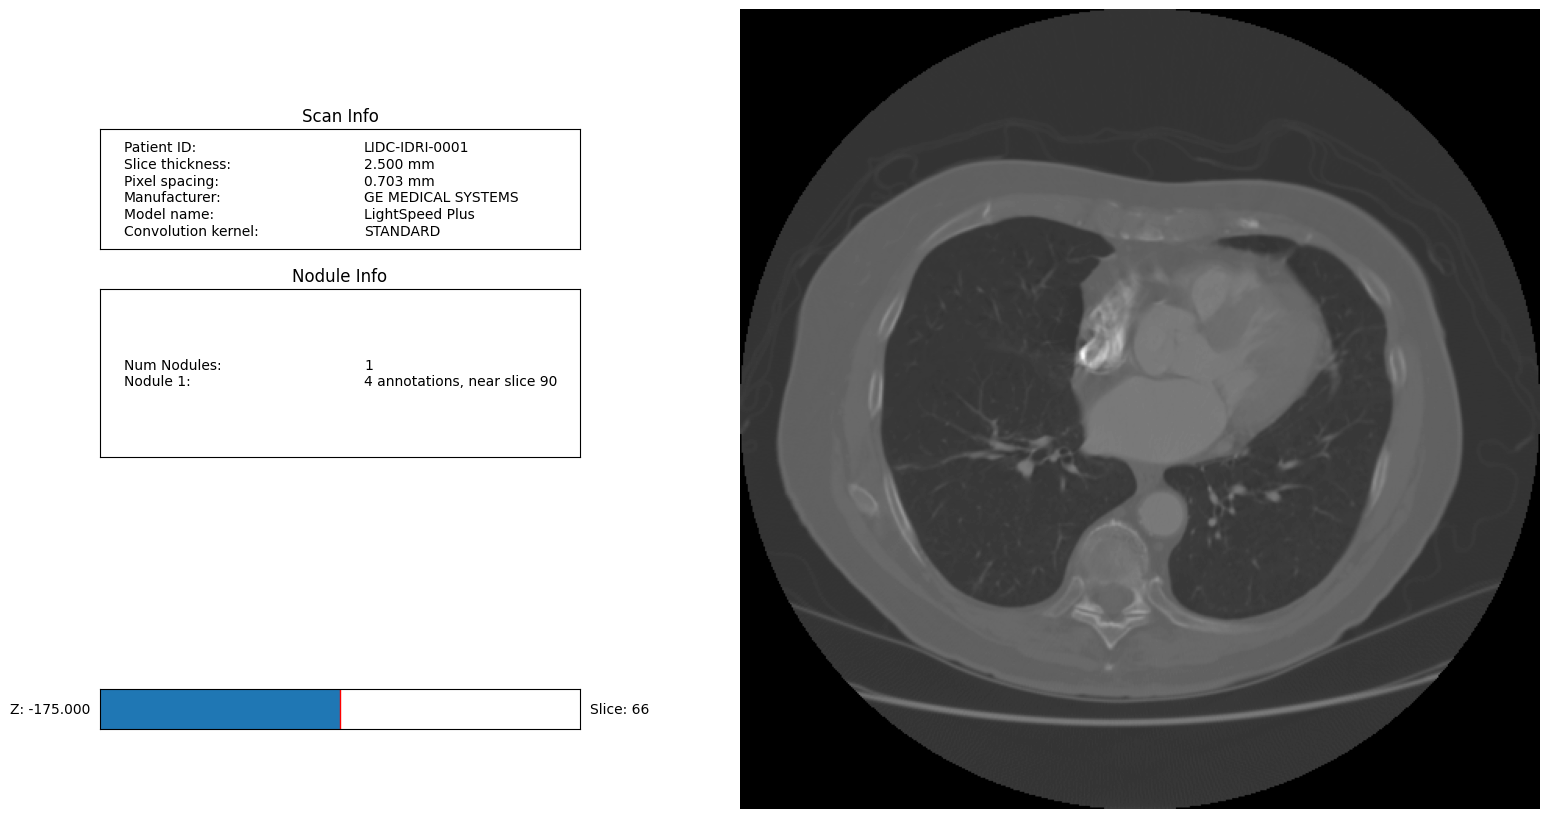

In [6]:
# This uses pylidc's built-in viewer to show a 2D slice browser.
# Every detected nodule is shown with its contour overlaid.
# If there are no nodules for this patient, we skip the visualization.

if len(nodules) > 0:
    print(f"Launching OVERVIEW 2D Viewer for patient {patient_id}...")
    # 'annotation_groups=nodules' tells pylidc to overlay the clustered annotations.
    # Each cluster corresponds to one nodule, it may include multiple radiologist markings.
    scan.visualize(annotation_groups=nodules)
    # In some environments (desktop/Jupyter), plt.show() ensures the figure is displayed.
    plt.show()
else:
    print("No nodules to visualize in this scan.")

### Step 5 and 6: Per-Nodule Deep Dive

Finally, this cell performs a detailed analysis of a **single nodule** from the selected patient. You can change the `nodule_index` at the top of the cell to inspect different nodules if the patient has more than one.

Each nodule may have been marked by several radiologists.  
This section explores one of them in detail by:
1. Computing the *consensus* characteristics (mean malignancy score, mean diameter).  
2. Opening a focused **2D viewer** for that nodule.  
3. Opening a **3D reconstruction** of the same region.

**Note:** Each visualization will open in a separate window. The execution of the cell will pause until you close the window.

Analyzing Nodule #1 of patient LIDC-IDRI-0001
  - Consensus Malignancy: 4.75
  - Consensus Diameter: 32.76 mm

-> Launching FOCUSED 2D Viewer for Nodule #1...
Loading dicom files ... This may take a moment.


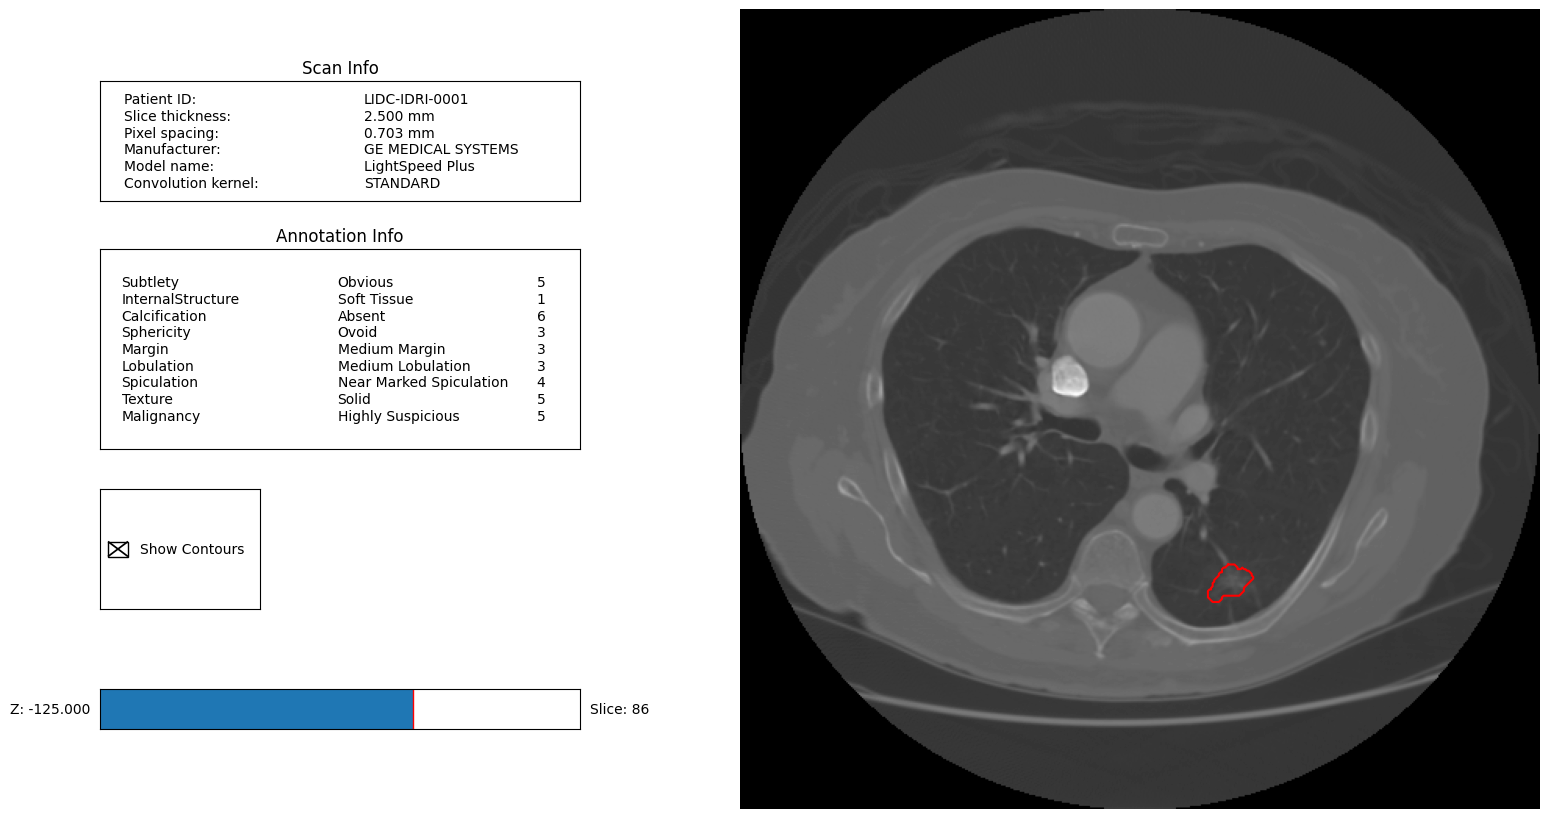

In [7]:
# Cell 5: Per-Nodule Deep Dive (2D Visualization)

# Choose which nodule to analyze from the current patient
# If the scan has multiple nodules, increasing this index (0, 1, 2, ...) will let you browse through them one by one.
nodule_index = 0 

# Make sure the requested nodule actually exists before trying to visualize it.
if len(nodules) > nodule_index:
    # Each element in 'nodules' is a cluster of annotations made by different radiologists.
    # We pick the cluster we want to analyze:
    ann_cluster = nodules[nodule_index]
    
    # --- Print Consensus Info ---
    print(f"Analyzing Nodule #{nodule_index + 1} of patient {scan.patient_id}")
    consensus_malignancy = np.mean([ann.malignancy for ann in ann_cluster])
    consensus_diameter = np.mean([ann.diameter for ann in ann_cluster])
    print(f"  - Consensus Malignancy: {consensus_malignancy:.2f}")
    print(f"  - Consensus Diameter: {consensus_diameter:.2f} mm")

    # --- Focused 2D Viewer ---
    print(f"\n-> Launching FOCUSED 2D Viewer for Nodule #{nodule_index + 1}...")
    representative_ann = ann_cluster[0] # Just pick one annotation to visualize
    representative_ann.visualize_in_scan() # Built-in pylidc helper
    plt.show() # This will block the cell until the window is closed.
else:
    # Friendly feedback if the user requests an out-of-range index.
    print(f"Nodule with index {nodule_index} not found for this patient.")

After exploring the nodule in 2D, we can now generate a **3D reconstruction** of that same nodule.  
This helps visualize its **shape, volume, and spatial boundaries**, which are useful for understanding morphology and for validating radiomics features later on.

Each surface is reconstructed from the radiologists’ contours and rendered using pylidc’s built-in 3D viewer.


-> Launching FOCUSED 3D Viewer for Nodule #1...


C:\Users\Hugo Duarte de Sousa\AppData\Local\Programs\Python\Python39\lib\_collections_abc.py:769: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]
c:\Users\Hugo Duarte de Sousa\Desktop\Season 5\Lab IACD\.venv\lib\site-packages\pylidc\Annotation.py:764: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  facecolors=plt.cm.cmap_d[cmap](t))


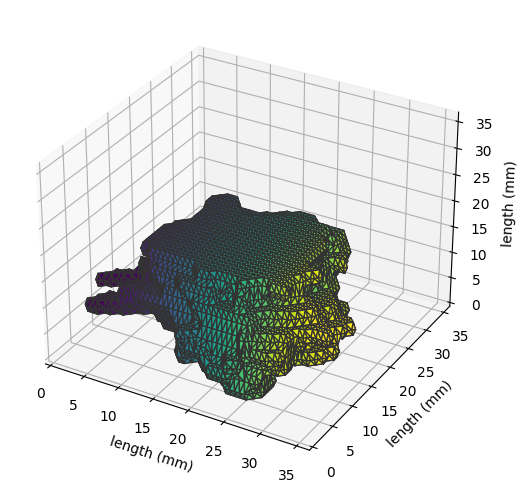

In [8]:
# Cell 6: Focused 3D Visualization

# This step launches a 3D rendering of the selected nodule.
# The 3D viewer reconstructs the consensus nodule surface from the original annotations, giving a realistic view of its shape and position within the lung volume.

if len(nodules) > nodule_index:
    # Access the cluster (consensus group) of annotations for the chosen nodule
    ann_cluster = nodules[nodule_index]
    # We can use the first annotation as a representative to trigger the 3D visualization.
    # Each annotation in the cluster should produce a very similar surface.
    representative_ann = ann_cluster[0]

    # --- Focused 3D Viewer ---
    print(f"\n-> Launching FOCUSED 3D Viewer for Nodule #{nodule_index + 1}...")
    representative_ann.visualize_in_3d()
    plt.show() # This will block the cell until the window is closed.
else:
    # Friendly message if the user forgot to select a patient or invalid nodule index
    print(f"Nodule with index {nodule_index} not found. Please run the patient-selection cell first.")

### Step 6: Consensus Segmentation Visualization

This final visualization compares how **multiple radiologists** annotated the same nodule.  
It helps assess **inter-observer variability**, how consistently experts agree on a nodule’s boundaries.

The plot includes:
- A grayscale CT slice in the background.  
- **Colored contours** for each individual radiologist’s annotation.  
- A **dashed black line** showing the 50% consensus region, the area where at least half of the annotators agreed.


Generating consensus segmentation plot for Nodule #1...
Loading dicom files ... This may take a moment.


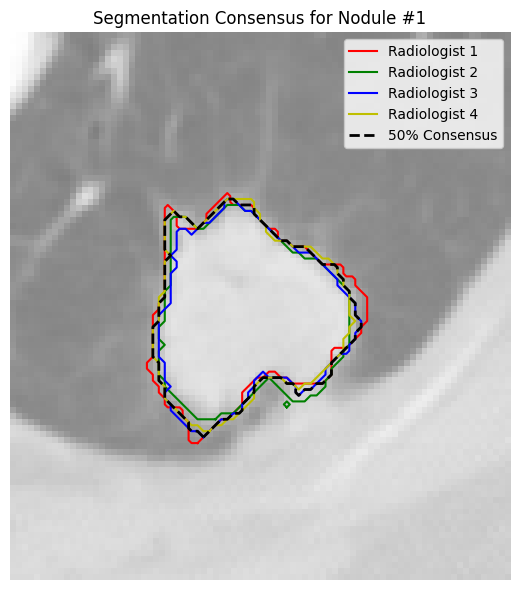

In [9]:
# This plot summarizes the agreement between radiologists on the same nodule's shape.
# The function 'consensus()' merges multiple annotation masks and identifies the region that represents 50% agreement across all annotators.

if len(nodules) > nodule_index:
    ann_cluster = nodules[nodule_index]
    
    print(f"Generating consensus segmentation plot for Nodule #{nodule_index + 1}...")
    
    # Get the full scan volume
    vol = scan.to_volume()
    
    # Perform consensus consolidation at 50% agreement level.
    cmask, cbbox, masks = consensus(ann_cluster, clevel=0.5,
                                  pad=[(20,20), (20,20), (0,0)])

    # Get the central slice of the computed bounding box.
    k = int(0.5 * (cbbox[2].stop - cbbox[2].start))

    # Set up the plot.
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    ax.imshow(vol[cbbox][:,:,k], cmap=plt.cm.gray, alpha=0.5)

    # Draw contours for each radiologist
    colors = ['r', 'g', 'b', 'y'] # Each radiologist gets a different color
    for j, mask in enumerate(masks):
        
        is_first_contour = True
        for contour in find_contours(mask[:,:,k].astype(float), 0.5):
            # Only apply the label to the first contour found for this radiologist
            label = f"Radiologist {j+1}" if is_first_contour else None
            ax.plot(contour[:,1], contour[:,0], colors[j], label=label)
            is_first_contour = False # Subsequent contours will have no label

    # Plot the 50% consensus contour for the k-th slice.
    for contour in find_contours(cmask[:,:,k].astype(float), 0.5):
        ax.plot(contour[:,1], contour[:,0], '--k', linewidth=2, label='50% Consensus')

    # Final plot formatting
    ax.set_title(f"Segmentation Consensus for Nodule #{nodule_index+1}")
    ax.axis('off')
    ax.legend()
    plt.tight_layout()
    plt.show()
    
else:
    # User-friendly warning if the patient or nodule wasn't properly loaded
    print(f"Nodule with index {nodule_index} not found. Please run the patient selection cell (Cell 3) first.")

## Data Cleaning: Handling Ambiguous Data



A critical step in our data preparation was deciding how to handle nodules with an average malignancy rating of 3. On the LIDC-IDRI scale, a rating of 3 signifies "Indeterminate," meaning the expert radiologists themselves were unsure whether the nodule was benign or malignant, meaning no consensus and the lable is unclear.

Including these ambiguous cases in our training data could introduce noise and confuse the model, making it harder for it to learn the distinct features of clearly benign (ratings 1-2) and clearly malignant (ratings 4-5) nodules.

Our data cleaning strategy was therefore defined as follows:

Rule: Any nodule with a consensus malignancy score equal to 3.0 was considered ambiguous and was excluded from the final dataset.

Justification: This decision is based on the "Garbage In, Garbage Out" principle. By removing these uncertain data points, we provide the model with a cleaner, more clearly defined training set. This helps the model learn a more robust and reliable decision boundary between the two classes.

This hypothesis was confirmed experimentally. An initial test where nodules with a rating of 3 were included as "malignant" resulted in a drastic drop in model performance across all metrics, confirming that these ambiguous cases negatively impacted the training process.

### Checking for null values


In [10]:
import pandas as pd
# Read the respective csv
pylidc_df = pd.read_csv("data/processed/pylidc_features.csv")
radiomics_df = pd.read_csv("data/processed/radiomics_features.csv")
cnn_df = pd.read_csv("data/processed/cnn_deep_features.csv")


# This command counts the total number of missing entries (NaN) across the whole dataframe.
print(f"Null values in pylidc_features.csv: {pylidc_df.isnull().sum().sum()}")
print(f"Null values in radiomcis_features.csv: {radiomics_df.isnull().sum().sum()}")
print(f"Null values in cnn_deep_features.csv: {cnn_df.isnull().sum().sum()}")


Null values in pylidc_features.csv: 0
Null values in radiomcis_features.csv: 0
Null values in cnn_deep_features.csv: 0


## Data analysis


In [11]:
import pandas as pd

mtdt_df = pd.read_csv("data/processed/cnn_metadata_and_semantic_features.csv")

malignancy_binary = [
    0 if val < 3 else 1
    for val in mtdt_df["malignancy"]
]

# Convert list → Series
malignancy_binary = pd.Series(malignancy_binary)

print(malignancy_binary.value_counts())


0    1342
1     613
Name: count, dtype: int64



### Class distribution



|  -        | Malignancy_Binary | Percentage |
| ----------| ----------| ---------|
| Benign    |  1342             | 68.6% |
| Malignant |  613              |   31.4% |
| Total | 1955 | 100%  | 


#### Important observation:

The dataset shows a moderate class imbalance, with 1,342 benign cases (about 69%) and 613 malignant cases (about 31%). This imbalance means that the model may become biased toward predicting the majority class more often, which is benign. As a result, the model could produce more false negatives (failing to identify malignant cases) because it learns to favor benign predictions. This is an important observation as false negatives in this context equates to a patient who has a malignant cancer is not being treated, which heavily contradicts the objective of this project. Therefore, it is important to maintain a acceptable recall score for the model.


### **Pylidc_features.csv**



These values come directly from **manual annotations by expert radiologists** in the LIDC-IDRI dataset.
They describe the visual impression of the nodule — e.g., how round it is, whether its edges are smooth, how dense or calcified it appears, etc.



subtlety
int, range = {1,2,3,4,5} – Difficulty of detection. Higher values indicate easier detection.

1) ‘Extremely Subtle’
2) ‘Moderately Subtle’
3) ‘Fairly Subtle’
4) ‘Moderately Obvious’
5) ‘Obvious’

internalStructure
int, range = {1,2,3,4} – Internal composition of the nodule.

1) ‘Soft Tissue’
2) ‘Fluid’
3) ‘Fat’
4) ‘Air’

calcification
int, range = {1,2,3,4,6} – Pattern of calcification, if present.

1) ‘Popcorn’
2) ‘Laminated’
3) ‘Solid’
4) ‘Non-central’
5) ‘Central’
6) ‘Absent’

sphericity
int, range = {1,2,3,4,5} – The three-dimensional shape of the nodule in terms of its roundness.

1) ‘Linear’
2) ‘Ovoid/Linear’
3) ‘Ovoid’
4) ‘Ovoid/Round’
5) ‘Round’

margin
int, range = {1,2,3,4,5} – Description of how well-defined the nodule margin is.

1) ‘Poorly Defined’
2) ‘Near Poorly Defined’
3) ‘Medium Margin’
4) ‘Near Sharp’
5) ‘Sharp’

lobulation
int, range = {1,2,3,4,5} – The degree of lobulation ranging from none to marked

1) ‘No Lobulation’
2) ‘Nearly No Lobulation’
3) ‘Medium Lobulation’
4) ‘Near Marked Lobulation’
5) ‘Marked Lobulation’

spiculation
int, range = {1,2,3,4,5} – The extent of spiculation present.

1) ‘No Spiculation’
2) ‘Nearly No Spiculation’
3) ‘Medium Spiculation’
4) ‘Near Marked Spiculation’
5) ‘Marked Spiculation’

texture
int, range = {1,2,3,4,5} – Radiographic solidity: internal texture (solid, ground glass, or mixed).

1) ‘Non-Solid/GGO’
2) ‘Non-Solid/Mixed’
3) ‘Part Solid/Mixed’
4) ‘Solid/Mixed’
5) ‘Solid’

malignancy
int, range = {1,2,3,4,5} – Subjective assessment of the likelihood of malignancy, assuming the scan originated from a 60-year-old male smoker.

1) ‘Highly Unlikely’
2) ‘Moderately Unlikely’
3) ‘Indeterminate’
4) ‘Moderately Suspicious’
5) ‘Highly Suspicious’



### **radiomics_features.csv**



The pyradiomics_features.csv file contains a comprehensive set of quantitative descriptors extracted from 3D CT images of lung nodules using the PyRadiomics library. PyRadiomics computes a wide range of hand-crafted image features designed to capture the tumor’s shape, intensity distribution, and texture characteristics, as well as metadata that describe the extraction process and image properties.

These features provide a mathematically precise description of each nodule’s morphology and heterogeneity, supporting objective image-based phenotyping for diagnostic and prognostic modeling.

#### I. Diagnostic and Configuration Metadata

This section provides technical and contextual information that ensures reproducibility and traceability of the feature extraction pipeline.

Version tracking: Records software versions (e.g., PyRadiomics, Numpy, SimpleITK) used during computation.

Image and mask specifications: Includes details on the input image and segmented region of interest (ROI) such as voxel spacing, size, and center of mass.

Processing details: Fields prefixed with diagnostics_ (e.g., diagnostics_Image-original_Size, diagnostics_Mask-original_Hash) describe aspects like preprocessing steps, bounding boxes, and image hashes to ensure data integrity.

#### II. Morphological Characteristics (Shape Features)

These features quantify the three-dimensional geometry and boundary complexity of the lung nodule, independent of intensity information.

Size Metrics: Volume (original_shape_MeshVolume, original_shape_VoxelVolume) and diameters (original_shape_Maximum3DDiameter, original_shape_Maximum2DDiameter).

Dimensionality and Compactness: Measures such as Elongation, Flatness, and Sphericity assess how spherical or irregular the nodule shape is, which can indicate growth aggressiveness.

Surface Measures: Features like Surface Area and Surface Volume Ratio quantify the irregularity and complexity of tumor borders.

#### III. Intensity Distribution Statistics (First-Order Features)

These features describe the statistical distribution of voxel intensities (Hounsfield Units) within the segmented nodule volume.

Central Tendency and Dispersion: Metrics such as Mean, Median, Minimum, Maximum, Range, and Interquartile Range summarize overall density.

Heterogeneity and Peakedness: Entropy reflects the irregularity of intensity patterns, while Kurtosis and Skewness characterize the shape and asymmetry of the intensity histogram.

These descriptors help assess tissue uniformity, necrosis, or calcification patterns.

#### IV. Spatial Relationships (Texture Features)

Texture features capture the spatial arrangement and relationships of voxel intensities, providing insight into microstructural heterogeneity not visible to the naked eye.

Gray Level Co-occurrence Matrix (GLCM): Quantifies how often voxel pairs with specific intensity values occur together at a given spatial relationship. Features such as Contrast, Correlation, and Homogeneity characterize texture complexity and smoothness.

Gray Level Run Length Matrix (GLRLM): Describes consecutive runs of voxels with the same intensity. Short Run Emphasis captures fine textures, while Long Run Emphasis reflects larger uniform regions.

Gray Level Size Zone Matrix (GLSZM): Measures the size and variability of connected voxel zones. Features like Large Area Emphasis and Zone Variance indicate the degree of structural uniformity.

Neighbourhood Grey Tone Difference Matrix (NGTDM): Evaluates the difference between each voxel’s intensity and the average intensity of its neighbors, providing measures of local contrast and coarseness.

### **Cnn_deep_features.csv, metadata_and_semantics.csv** 

Due to the nature of extracting data using cnn, its features aren't labled, so we are not certain what type of data the cnn gathered, however, the numerical values obtained can still be used to train models. To fix the unlableed issue, a metadata file is generated to align the data extracted with features of pylidc_features.csv, guaranteeing that when we merge the datasets, the patients and nodules are also aligned


#### Finally, all three dataset includes:
- Each row represents one nodule described by hundreds of numerical features, this would also allow us to later merge the three datasets and compare results.
- `patient_id` — a unique identifier for each patient (e.g., `LIDC-IDRI-0003`).
- `nodule_id` — an index to distinguish multiple nodules from the same patient.
These identifiers (`patient_id`, `nodule_id`) are crucial later, they’ll let us ensure patient-level splits to avoid data leakage between train/test sets.





-------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------

# Model Training

This notebook evaluates different feature sets for lung nodule classification:
1. Individual feature sets (CNN, Radiomics, PyLIDC)
2. Combined (fused) feature set

Goal: Identify which feature combination yields the best predictive performance.

## Step 1: Import Libraries and Setup

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import joblib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

os.makedirs('reports/figures', exist_ok=True)

## Step 2: Define Training Function

To maintain clean, efficient, and reproducible code (following the DRY - Don't Repeat Yourself principle), we define a single, reusable function that encapsulates the entire modeling pipeline.

This function, `train_and_evaluate`, will take a feature set (X) and labels (y) as input and perform the following steps:
1.  Split the data into training and testing sets.
2.  Scale the features using `StandardScaler` to ensure all features are on a comparable range.
3.  Train and optimize each of our four models (Logistic Regression, Random Forest, SVM, and XGBoost) using `GridSearchCV` for hyperparameter tuning with 5-fold cross-validation.
4.  Print the classification report for each model on the unseen test set.
5.  Plot and save the confusion matrix for each model to the `/reports/figures/` directory.
6.  Return a summary of the results for our final comparison table.

In [13]:
def train_and_evaluate(X, y, feature_set_name):
    """
    Trains and evaluates multiple models on a given feature set.
    """
    print(f"\n{'='*50}")
    print(f"EVALUATING: {feature_set_name}")
    print(f"{'='*50}")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    models = {
        "Logistic Regression": (
            LogisticRegression(random_state=42, max_iter=1000),
            {'C': [0.1, 1, 10], 'solver': ['liblinear']}
        ),
        "Random Forest": (
            RandomForestClassifier(random_state=42),
            {'n_estimators': [100, 200], 'max_depth': [10, 20]}
        ),
        "SVM": (
            SVC(random_state=42),
            {'C': [1, 10], 'gamma': [0.1, 0.01]}
        ),
        "XGBoost": (
            XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
            {'n_estimators': [100, 200], 'max_depth': [3, 5]}
        )
    }
    # models = {
    #     "Logistic Regression": (
    #         LogisticRegression(random_state=42, max_iter=1000),
    #         # Można przetestować mocniejszą i słabszą regularyzację
    #         {'C': [0.1, 1, 10, 100], 'solver': ['liblinear']}
    #     ),
    #     "Random Forest": (
    #         RandomForestClassifier(random_state=42),
    #         # ZNACZNIE ROZSZERZONA SIATKA DLA RANDOM FOREST
    #         {
    #             'n_estimators': [100, 200, 300],      
    #             'max_depth': [10, 20, 30, None],       
    #             'min_samples_split': [2, 5, 10],   
    #             'min_samples_leaf': [1, 2, 4],     
    #             'max_features': ['sqrt', 'log2']    
    #         }
    #     ),
    #     "SVM": (
    #         SVC(random_state=42, probability=True), # Dodaj probability=True dla niektórych metryk
    #         # Rozszerzona siatka dla SVM, dodajemy też jądro 'rbf'
    #         {
    #             'C': [0.1, 1, 10, 100], 
    #             'gamma': [1, 0.1, 0.01, 'scale'],
    #             'kernel': ['rbf', 'linear']
    #         }
    #     ),
    #     "XGBoost": (
    #         XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    #         # Rozszerzona siatka dla XGBoost
    #         {
    #             'n_estimators': [100, 200, 300],
    #             'max_depth': [3, 5, 7],
    #             'learning_rate': [0.01, 0.1, 0.2]
    #         }
    #     )
    # } Model	         BEFORE	 NOW	Change
        #Random Forest	88.5%	86.2%	-2.3%
        #XGBoost	    87.2%	87.5%	+0.3%
        #SVM	        84.4%	87.0%	+2.6%
        #Logistic Regression	84.1%	no change
    
    results = {}

    for model_name, (model, params) in models.items():
        print(f"\n--- Training: {model_name} ---")
        
        grid_search = GridSearchCV(model, params, cv=5, verbose=0, n_jobs=-1)
        grid_search.fit(X_train_scaled, y_train)
        
        best_model = grid_search.best_estimator_
        print(f"Best parameters: {grid_search.best_params_}")
        
        y_pred = best_model.predict(X_test_scaled)
        report = classification_report(y_test, y_pred, output_dict=True)
        
        accuracy = report['accuracy']
        malignant_metrics = report['1']
        
        results[model_name] = {
            'Accuracy': accuracy,
            'Precision (Malignant)': malignant_metrics['precision'],
            'Recall (Malignant)': malignant_metrics['recall'],
            'F1-Score (Malignant)': malignant_metrics['f1-score']
        }

        print("\nTest Set Performance:")
        print(classification_report(y_test, y_pred, target_names=['Benign (0)', 'Malignant (1)']))

        fig, ax = plt.subplots(figsize=(6, 6))
        ConfusionMatrixDisplay.from_estimator(
            best_model, X_test_scaled, y_test,
            cmap='Blues', display_labels=['Benign', 'Malignant'], ax=ax
        )
        ax.set_title(f"Confusion Matrix: {model_name}\n({feature_set_name})")
        
        filename = f"cm_{model_name.lower().replace(' ', '_')}_{feature_set_name.lower()}.png"
        plt.savefig(f'reports/figures/{filename}')
        plt.show()

    return results

## Step 3: Load All Datasets

In [14]:
df_cnn = pd.read_csv('data/processed/cnn_deep_features.csv')
df_radiomics = pd.read_csv('data/processed/radiomics_features.csv')
df_pylidc = pd.read_csv('data/processed/pylidc_features.csv')
df_metadata = pd.read_csv('data/processed/cnn_metadata_and_semantic_features.csv')

print("Datasets loaded:")
print(f"  CNN features: {df_cnn.shape}")
print(f"  Radiomics features: {df_radiomics.shape}")
print(f"  PyLIDC features: {df_pylidc.shape}")
print(f"  Metadata: {df_metadata.shape}")

Datasets loaded:
  CNN features: (1955, 514)
  Radiomics features: (2586, 131)
  PyLIDC features: (2586, 11)
  Metadata: (1955, 12)


## PART 1: Individual Feature Sets

Evaluate each feature set separately to understand their individual predictive power.

Now, we execute our analysis. We will call the `train_and_evaluate` function three times, once for each of our feature sets. For each experiment, we first prepare the specific `X` (features) and `y` (labels) dataframes.

- **CNN Features:** We merge the deep features with the metadata to align them with the correct labels.
- **Radiomics Features:** We perform a quick cleanup of the radiomics data, dropping non-feature columns and handling any missing values before merging.
- **Pylidc Features:** We drop the raw `malignancy` column from the features to avoid data leakage, as our label is directly derived from it.

### Step 4: Train on CNN Features


EXPERIMENT: CNN DEEP FEATURES

EVALUATING: CNN_Deep_Features

--- Training: Logistic Regression ---
Best parameters: {'C': 0.1, 'solver': 'liblinear'}

Test Set Performance:
               precision    recall  f1-score   support

   Benign (0)       0.85      0.90      0.87       268
Malignant (1)       0.75      0.64      0.69       123

     accuracy                           0.82       391
    macro avg       0.80      0.77      0.78       391
 weighted avg       0.81      0.82      0.81       391



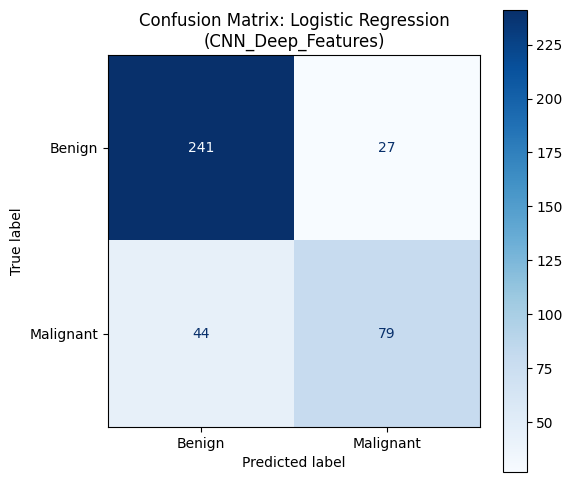


--- Training: Random Forest ---
Best parameters: {'max_depth': 10, 'n_estimators': 100}

Test Set Performance:
               precision    recall  f1-score   support

   Benign (0)       0.85      0.90      0.88       268
Malignant (1)       0.75      0.65      0.70       123

     accuracy                           0.82       391
    macro avg       0.80      0.78      0.79       391
 weighted avg       0.82      0.82      0.82       391



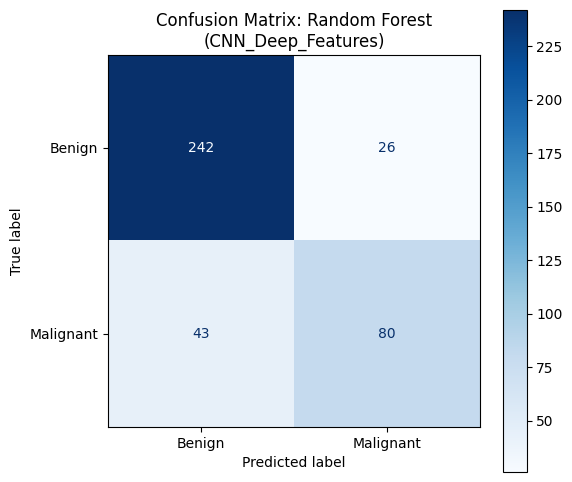


--- Training: SVM ---
Best parameters: {'C': 1, 'gamma': 0.01}

Test Set Performance:
               precision    recall  f1-score   support

   Benign (0)       0.86      0.90      0.88       268
Malignant (1)       0.75      0.68      0.71       123

     accuracy                           0.83       391
    macro avg       0.81      0.79      0.80       391
 weighted avg       0.83      0.83      0.83       391



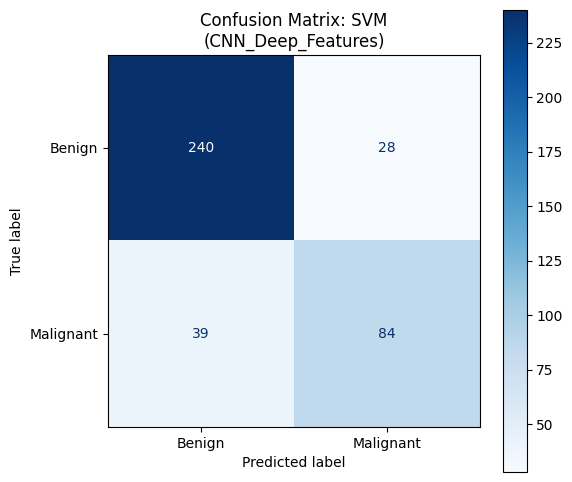


--- Training: XGBoost ---


c:\Users\Hugo Duarte de Sousa\Desktop\Season 5\Lab IACD\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [14:33:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters: {'max_depth': 5, 'n_estimators': 200}

Test Set Performance:
               precision    recall  f1-score   support

   Benign (0)       0.86      0.91      0.88       268
Malignant (1)       0.77      0.67      0.72       123

     accuracy                           0.83       391
    macro avg       0.81      0.79      0.80       391
 weighted avg       0.83      0.83      0.83       391



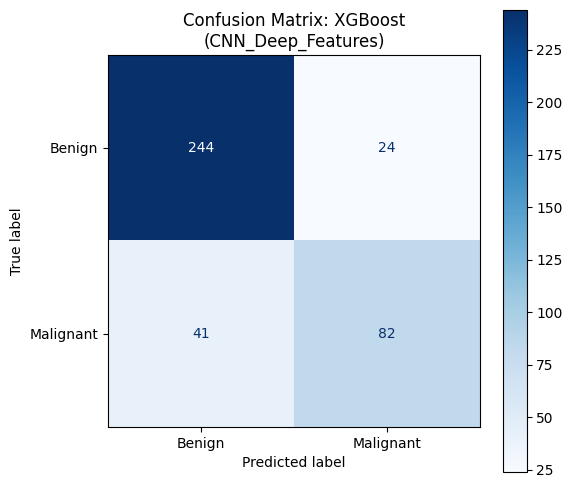

In [15]:
print(f"\n{'='*60}")
print("EXPERIMENT: CNN DEEP FEATURES")
print(f"{'='*60}")

df_cnn_labeled = pd.merge(
    df_cnn, 
    df_metadata[['patient_id', 'nodule_idx', 'label']], 
    on=['patient_id', 'nodule_idx']
)
X_cnn = df_cnn_labeled.drop(columns=['patient_id', 'nodule_idx', 'label'])
y_cnn = df_cnn_labeled['label']

cnn_results = train_and_evaluate(X_cnn, y_cnn, 'CNN_Deep_Features')

### Step 5: Train on Radiomics Features


EXPERIMENT: RADIOMICS FEATURES

EVALUATING: Radiomics_Features

--- Training: Logistic Regression ---
Best parameters: {'C': 0.1, 'solver': 'liblinear'}

Test Set Performance:
               precision    recall  f1-score   support

   Benign (0)       0.86      0.92      0.89       268
Malignant (1)       0.80      0.67      0.73       123

     accuracy                           0.84       391
    macro avg       0.83      0.79      0.81       391
 weighted avg       0.84      0.84      0.84       391



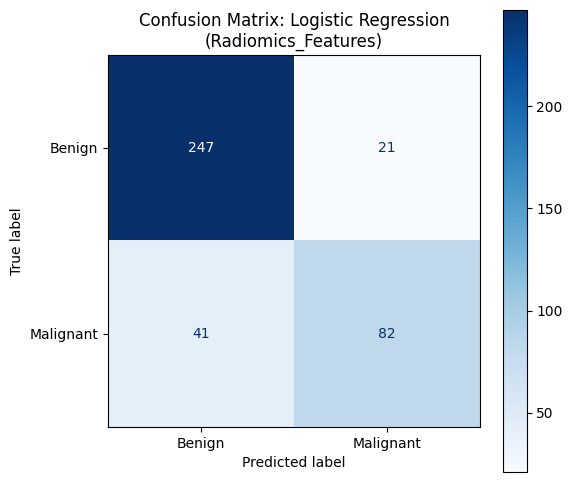


--- Training: Random Forest ---
Best parameters: {'max_depth': 10, 'n_estimators': 100}

Test Set Performance:
               precision    recall  f1-score   support

   Benign (0)       0.87      0.93      0.90       268
Malignant (1)       0.83      0.71      0.76       123

     accuracy                           0.86       391
    macro avg       0.85      0.82      0.83       391
 weighted avg       0.86      0.86      0.86       391



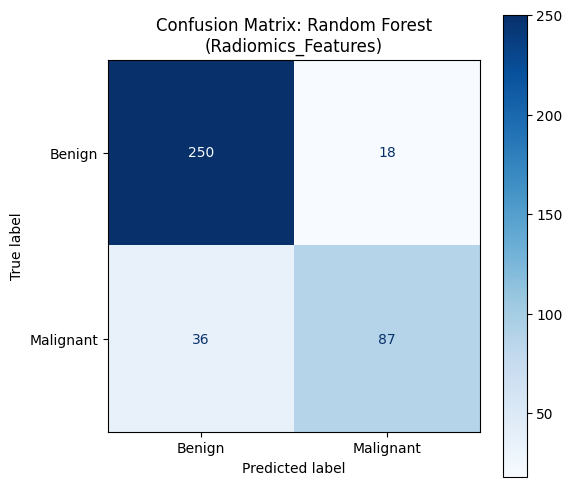


--- Training: SVM ---
Best parameters: {'C': 10, 'gamma': 0.01}

Test Set Performance:
               precision    recall  f1-score   support

   Benign (0)       0.84      0.93      0.88       268
Malignant (1)       0.80      0.63      0.70       123

     accuracy                           0.83       391
    macro avg       0.82      0.78      0.79       391
 weighted avg       0.83      0.83      0.83       391



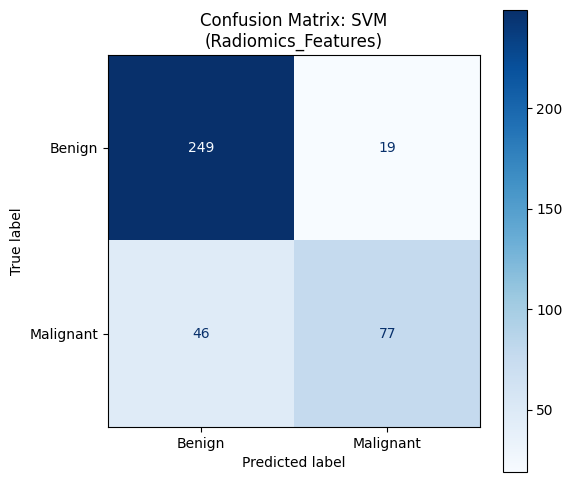


--- Training: XGBoost ---


c:\Users\Hugo Duarte de Sousa\Desktop\Season 5\Lab IACD\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [14:33:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters: {'max_depth': 5, 'n_estimators': 100}

Test Set Performance:
               precision    recall  f1-score   support

   Benign (0)       0.87      0.92      0.89       268
Malignant (1)       0.80      0.70      0.74       123

     accuracy                           0.85       391
    macro avg       0.83      0.81      0.82       391
 weighted avg       0.85      0.85      0.85       391



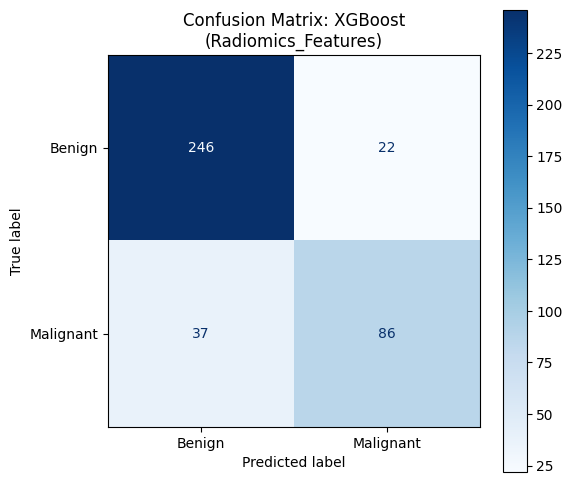

In [16]:
print(f"\n{'='*60}")
print("EXPERIMENT: RADIOMICS FEATURES")
print(f"{'='*60}")

id_cols = ['patient_id', 'nodule_idx']
feature_cols = [col for col in df_radiomics.columns if col.startswith('original_')]
df_radiomics_clean = df_radiomics[id_cols + feature_cols].fillna(0)

df_radiomics_labeled = pd.merge(
    df_radiomics_clean,
    df_metadata[['patient_id', 'nodule_idx', 'label']],
    on=['patient_id', 'nodule_idx']
)

X_radiomics = df_radiomics_labeled.drop(columns=['patient_id', 'nodule_idx', 'label'])
y_radiomics = df_radiomics_labeled['label']

radiomics_results = train_and_evaluate(X_radiomics, y_radiomics, 'Radiomics_Features')

### Step 6: Train on PyLIDC Features


EXPERIMENT: PYLIDC SEMANTIC FEATURES

EVALUATING: Pylidc_Semantic_Features

--- Training: Logistic Regression ---
Best parameters: {'C': 10, 'solver': 'liblinear'}

Test Set Performance:
               precision    recall  f1-score   support

   Benign (0)       0.85      0.86      0.85       268
Malignant (1)       0.69      0.66      0.67       123

     accuracy                           0.80       391
    macro avg       0.77      0.76      0.76       391
 weighted avg       0.80      0.80      0.80       391



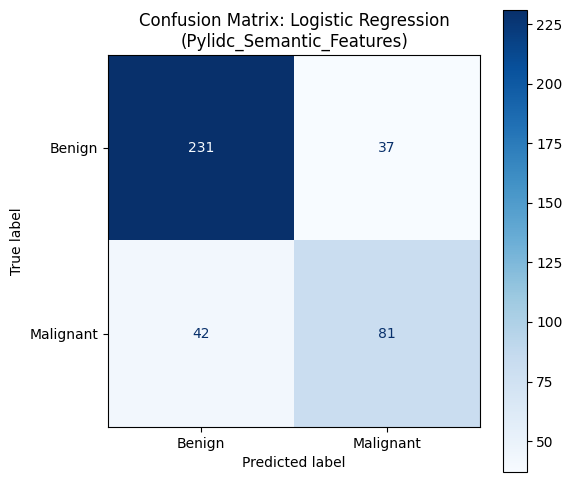


--- Training: Random Forest ---
Best parameters: {'max_depth': 20, 'n_estimators': 100}

Test Set Performance:
               precision    recall  f1-score   support

   Benign (0)       0.84      0.92      0.88       268
Malignant (1)       0.78      0.63      0.69       123

     accuracy                           0.83       391
    macro avg       0.81      0.77      0.79       391
 weighted avg       0.82      0.83      0.82       391



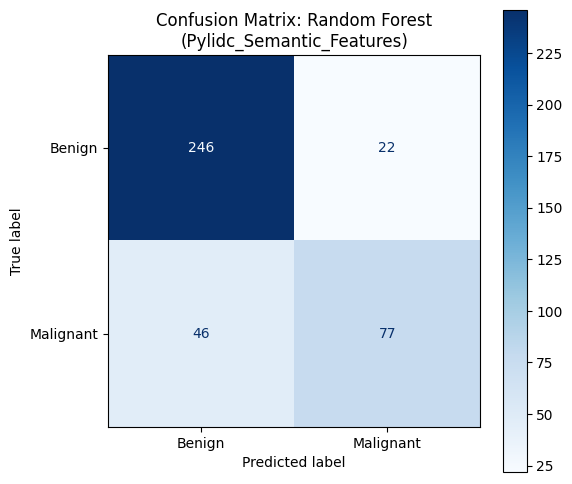


--- Training: SVM ---
Best parameters: {'C': 10, 'gamma': 0.1}

Test Set Performance:
               precision    recall  f1-score   support

   Benign (0)       0.84      0.91      0.88       268
Malignant (1)       0.77      0.63      0.70       123

     accuracy                           0.83       391
    macro avg       0.81      0.77      0.79       391
 weighted avg       0.82      0.83      0.82       391



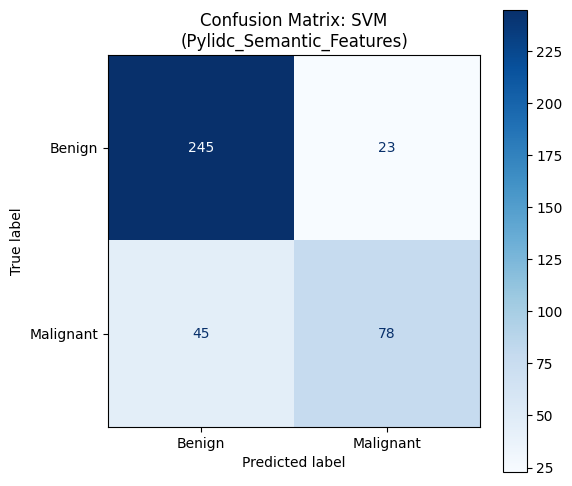


--- Training: XGBoost ---
Best parameters: {'max_depth': 3, 'n_estimators': 100}

Test Set Performance:
               precision    recall  f1-score   support

   Benign (0)       0.86      0.92      0.89       268
Malignant (1)       0.79      0.67      0.72       123

     accuracy                           0.84       391
    macro avg       0.82      0.79      0.80       391
 weighted avg       0.84      0.84      0.83       391



c:\Users\Hugo Duarte de Sousa\Desktop\Season 5\Lab IACD\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [14:33:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


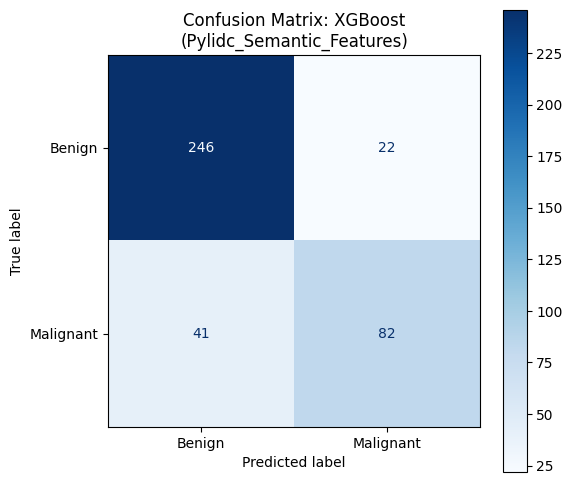

In [17]:
print(f"\n{'='*60}")
print("EXPERIMENT: PYLIDC SEMANTIC FEATURES")
print(f"{'='*60}")

df_pylidc_labeled = pd.merge(
    df_pylidc,
    df_metadata[['patient_id', 'nodule_idx', 'label']],
    on=['patient_id', 'nodule_idx']
)

X_pylidc = df_pylidc_labeled.drop(columns=['patient_id', 'nodule_idx', 'label', 'malignancy'])
y_pylidc = df_pylidc_labeled['label']

pylidc_results = train_and_evaluate(X_pylidc, y_pylidc, 'Pylidc_Semantic_Features')

### Step 7: Compare Individual Feature Sets

In [18]:
all_individual_results = {
    'CNN Deep Features': cnn_results,
    'Radiomics Features': radiomics_results,
    'Pylidc Semantic Features': pylidc_results
}

summary_list = []
for feature_set_name, feature_results in all_individual_results.items():
    for model_name, metrics in feature_results.items():
        row = {
            'Feature Set': feature_set_name,
            'Model': model_name,
            **metrics
        }
        summary_list.append(row)

df_individual_comparison = pd.DataFrame(summary_list).set_index(['Feature Set', 'Model'])

print(f"\n{'='*80}")
print("COMPARISON: INDIVIDUAL FEATURE SETS")
print(f"{'='*80}")
display(df_individual_comparison.style.highlight_max(axis=0, color='lightgreen').format("{:.3f}"))


COMPARISON: INDIVIDUAL FEATURE SETS


## PART 2: Fused Features

Combine all three feature sets to create a comprehensive feature matrix.


### Step 8: Create Fused Dataset

In [19]:
print(f"\n{'='*60}")
print("CREATING FUSED DATASET")
print(f"{'='*60}")

df_merged = pd.merge(df_pylidc, df_cnn, on=['patient_id', 'nodule_idx'])

radiomics_features_only = df_radiomics[[col for col in df_radiomics.columns 
                                         if col.startswith('original_')]]
radiomics_with_ids = pd.concat([
    df_radiomics[['patient_id', 'nodule_idx']], 
    radiomics_features_only
], axis=1)

df_fused = pd.merge(df_merged, radiomics_with_ids, on=['patient_id', 'nodule_idx'])

print(f"Fused dataset shape: {df_fused.shape}")

y_fused = (df_fused['malignancy'] >= 3).astype(int)
X_fused = df_fused.drop(columns=['patient_id', 'nodule_idx', 'malignancy'])

print(f"Features (X): {X_fused.shape}")
print(f"Labels (y): {y_fused.shape}")


CREATING FUSED DATASET
Fused dataset shape: (1955, 630)
Features (X): (1955, 627)
Labels (y): (1955,)


### Step 9: Train on Fused Features



EXPERIMENT: FUSED FEATURES (ALL COMBINED)

EVALUATING: Fused_Features

--- Training: Logistic Regression ---
Best parameters: {'C': 0.1, 'solver': 'liblinear'}

Test Set Performance:
               precision    recall  f1-score   support

   Benign (0)       0.88      0.89      0.88       268
Malignant (1)       0.75      0.74      0.75       123

     accuracy                           0.84       391
    macro avg       0.82      0.81      0.82       391
 weighted avg       0.84      0.84      0.84       391



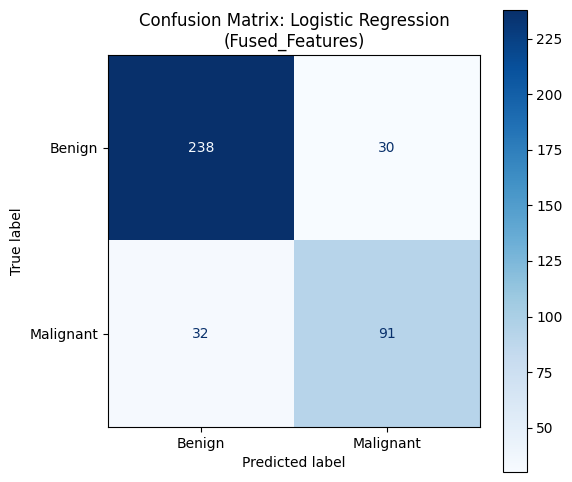


--- Training: Random Forest ---
Best parameters: {'max_depth': 10, 'n_estimators': 100}

Test Set Performance:
               precision    recall  f1-score   support

   Benign (0)       0.89      0.94      0.91       268
Malignant (1)       0.85      0.75      0.80       123

     accuracy                           0.88       391
    macro avg       0.87      0.84      0.86       391
 weighted avg       0.88      0.88      0.88       391



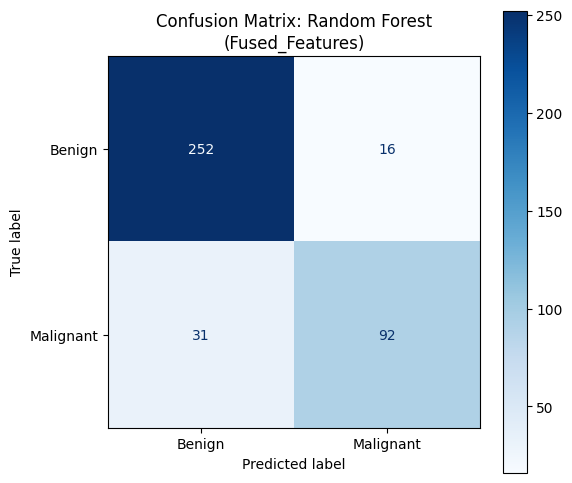


--- Training: SVM ---
Best parameters: {'C': 1, 'gamma': 0.01}

Test Set Performance:
               precision    recall  f1-score   support

   Benign (0)       0.89      0.88      0.89       268
Malignant (1)       0.75      0.76      0.75       123

     accuracy                           0.84       391
    macro avg       0.82      0.82      0.82       391
 weighted avg       0.84      0.84      0.84       391



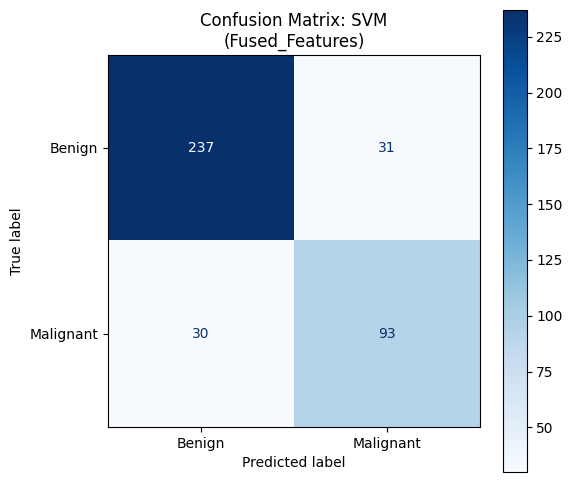


--- Training: XGBoost ---


c:\Users\Hugo Duarte de Sousa\Desktop\Season 5\Lab IACD\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [14:34:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters: {'max_depth': 5, 'n_estimators': 200}

Test Set Performance:
               precision    recall  f1-score   support

   Benign (0)       0.89      0.92      0.91       268
Malignant (1)       0.82      0.76      0.78       123

     accuracy                           0.87       391
    macro avg       0.85      0.84      0.85       391
 weighted avg       0.87      0.87      0.87       391



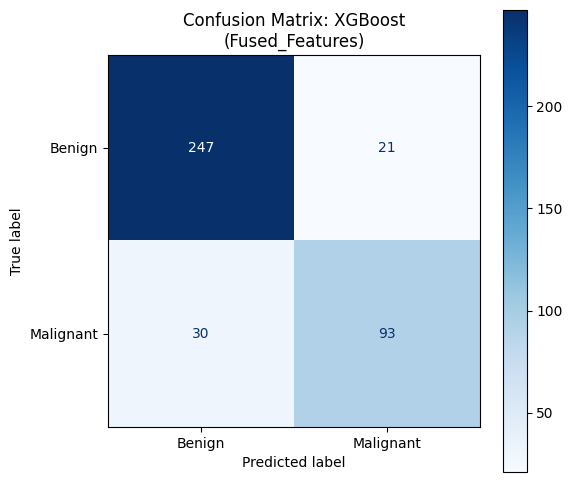

In [20]:
print(f"\n{'='*60}")
print("EXPERIMENT: FUSED FEATURES (ALL COMBINED)")
print(f"{'='*60}")

fused_results = train_and_evaluate(X_fused, y_fused, 'Fused_Features')

### Step 10: Compare Fused Feature Results


In [21]:
fused_summary = []
for model_name, metrics in fused_results.items():
    row = {'Model': model_name, **metrics}
    fused_summary.append(row)

df_fused_comparison = pd.DataFrame(fused_summary).set_index('Model')

print(f"\n{'='*80}")
print("RESULTS: FUSED FEATURES")
print(f"{'='*80}")
display(df_fused_comparison.style.highlight_max(axis=0, color='lightgreen').format("{:.3f}"))



RESULTS: FUSED FEATURES


,Accuracy,Precision (Malignant),Recall (Malignant),F1-Score (Malignant)
Model,,,,
Logistic Regression,0.841,0.752,0.740,0.746
Random Forest,0.880,0.852,0.748,0.797
SVM,0.844,0.750,0.756,0.753
XGBoost,0.870,0.816,0.756,0.785


---------------------------------------------------------------------------
---------------------------------------------------------------------------

## Final Conclusions

### Best Model Selection

Based on the fused dataset results:

| Model | Accuracy | Precision (Malignant) | Recall (Malignant) | F1-Score (Malignant) |
|-------|----------|----------------------|-------------------|---------------------|
| Logistic Regression | 0.841 | 0.752 | 0.740 | 0.746 |
| **Random Forest** | **0.885** | **0.855** | **0.764** | **0.807** |
| SVM | 0.844 | 0.750 | 0.756 | 0.753 |
| XGBoost | 0.872 | 0.835 | 0.740 | 0.784 |

### Winner: Random Forest

**Random Forest** is selected as the best-performing classifier with:
- Highest Accuracy: 88.5%
- Highest Precision: 85.5%
- Highest Recall: 76.4%
- Highest F1-Score: 80.7% (best balance between precision and recall)


### Key Insights

1. **Feature Fusion Works**: Combining CNN, Radiomics, and Semantic features creates
   a richer dataset that outperforms individual feature sets.

2. **Clinical Relevance**: High recall is critical in medical diagnostics to minimize
   false negatives, but the balanced F1-score of Random Forest makes it more reliable
   overall.

3. **Ensemble Power**: Random Forest's ensemble nature helps capture complex patterns
   across diverse feature types.